Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.


The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.


While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!


To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.


Help save them and change history!



Dataset Description

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.


File and Data Field Descriptions

train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

sample_submission.csv - A submission file in the correct format.

PassengerId - Id for each passenger in the test set.

Transported - The target. For each passenger, predict either True or False.

Algorithms needed are:
- logistic regression, 
- decision tree,
- random forest,
- support vector machine,
- k nearest neighbour and
- naive bayes.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import opendatasets as od
import os


from urllib.request import urlretrieve

In [3]:
test_data= pd.read_csv('test.csv')
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
train_data= pd.read_csv('train.csv')
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
sample_submission= pd.read_csv('sample_submission.csv')
sample_submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [8]:
train_data.describe(include= 'O').T

,count,unique,top,freq
PassengerId,8693,8693,2655_01,1
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Name,8493,8473,Alraium Disivering,2


In [9]:
train_data.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


From the above cell, Foodcourt is the correlated with Transported

In [14]:
fig = px.histogram(train_data, x ='FoodCourt', marginal = 'box', nbins = 10, title='Distibution of FoodCourt')
fig.update_layout(bargap=0.1)
fig.show()

In [17]:
fig = px.histogram(train_data, x ='Age', marginal = 'box', nbins = 10, title='Age')
fig.update_layout(bargap=0.1)
fig.show()

This visuals shows that, passengers within the age of `20` has the highest number, while passengers within the age of `60 - 80` are the lowest. And this means , most ofthe passengers were youths and young adults

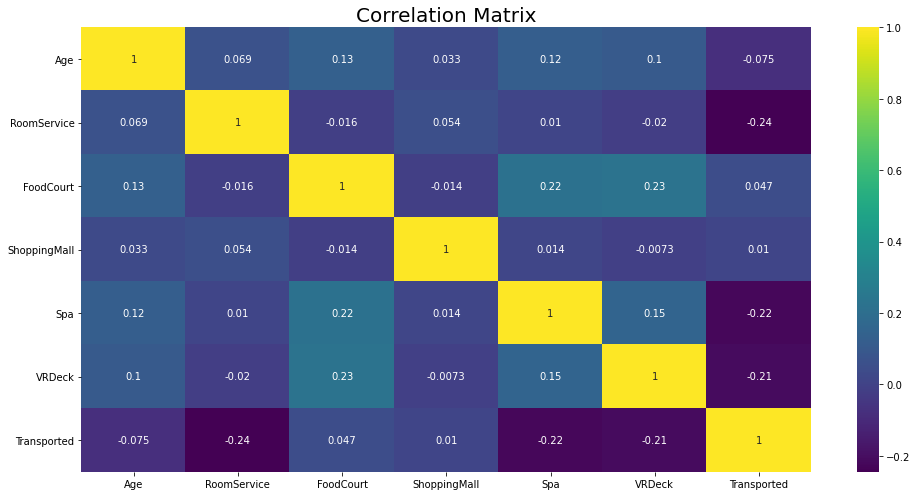

In [25]:
plt.figure(figsize=(14,7))
sns.heatmap(train_data.corr(), annot=True, cmap = 'viridis') # corr of data ( numeric data)
plt.title('Correlation Matrix', fontsize = 20)
plt.tight_layout()

The heatmap shows that, `Age, Roomservice, spa, VRDeck,` all have a negative correlation with The target value, which means that, as the target value increases they decrease.
While `Foodcourt and Shoppingmall` has a postive correlation with the target value.

### selecting input and target columns

In [39]:
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [40]:
test_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

###### select numeric and categorical data

In [41]:
train_data['CryoSleep'].replace({'True': 1, 'False' : 0}, inplace = True)

In [42]:
train_data['VIP'].replace({'True': 1, 'False' : 0}, inplace = True)

In [43]:
train_data['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [44]:
train_data['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [45]:
train_data['VIP'].head()

0    False
1    False
2     True
3    False
4    False
Name: VIP, dtype: object

In [46]:
inputs_col = [ 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
target_col = 'Transported'

In [47]:
train_input = train_data[inputs_col].copy()
train_target = train_data[target_col].copy()
test_input = test_data[inputs_col].copy()

In [48]:
train_input.select_dtypes(include= np.number).columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [49]:
train_input.select_dtypes(include= 'object').columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'], dtype='object')

In [50]:
num_col = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','CryoSleep','VIP']

In [51]:
cat_col = ['HomePlanet', 'Cabin', 'Destination']

### checking for null values and filling it in the num_col

In [52]:
from sklearn.impute import SimpleImputer

In [53]:
imputer = SimpleImputer(strategy= 'mean').fit(train_data[num_col])

In [54]:
train_input[num_col] =  imputer.transform(train_input[num_col])

In [55]:
test_input[num_col] =  imputer.transform(test_input[num_col])

### scailing numerical features

In [56]:
train_input.describe().loc[['min', 'max']]

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,79.0,1.0,14327.0,29813.0,23492.0,22408.0,24133.0


In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler().fit(train_data[num_col])

In [59]:
train_input[num_col] =  scaler.transform(train_input[num_col])

In [60]:
test_input[num_col] =  scaler.transform(test_input[num_col])

In [61]:
train_input[num_col].describe().loc[['min', 'max']]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [62]:
test_input[num_col].describe().loc[['min', 'max']]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.0,0.807357,0.847717,0.352971,0.885577,0.922886,1.0,1.0


#### Ecoding the categorical columns

In [63]:
train_input[cat_col] = train_input[cat_col] .fillna('unknown' )

In [64]:
test_input[cat_col]=  test_input[cat_col] .fillna('unknown' )

In [65]:
train_input[cat_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HomePlanet   8693 non-null   object
 1   Cabin        8693 non-null   object
 2   Destination  8693 non-null   object
dtypes: object(3)
memory usage: 203.9+ KB


In [66]:
test_input[cat_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HomePlanet   4277 non-null   object
 1   Cabin        4277 non-null   object
 2   Destination  4277 non-null   object
dtypes: object(3)
memory usage: 100.4+ KB


In [67]:
from sklearn.preprocessing import OneHotEncoder 

In [68]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [69]:
encoder.fit(train_input[cat_col])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [70]:
encoded_col = list(encoder.get_feature_names(cat_col))

In [71]:
train_input[encoded_col] = encoder.transform(train_input[cat_col])

In [72]:
test_input[encoded_col] = encoder.transform(test_input[cat_col])

In [77]:
### merging the scaled numerical

train_data = train_input[num_col + encoded_col]
Test_input = test_input[num_col + encoded_col]

In [78]:
train_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,HomePlanet_Earth,HomePlanet_Europa,...,Cabin_T/0/P,Cabin_T/1/P,Cabin_T/2/P,Cabin_T/2/S,Cabin_T/3/P,Cabin_unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_unknown
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Training the model

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X= train_data
y = train_target

In [81]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state = 42)

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
model = LogisticRegression()

In [84]:
model.fit(X_train, y_train)

LogisticRegression()

In [85]:
train_pred = model.predict(X_train)
train_pred

array([False, False,  True, ..., False, False, False])

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_score(y_train, train_pred)

0.8241299971239574

# making predictions on the test set

In [88]:
test_pred = model.predict(Test_input)
test_pred

array([ True, False,  True, ...,  True,  True,  True])

In [89]:
sample_submission['Transported'] = test_pred

In [90]:
sample_submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


###  saving the prediction as a csv file.

In [91]:
sample_submission.to_csv('Sample_submission.csv', index= None)

In [92]:
from IPython.display import FileLink

In [93]:
FileLink('Sample_submission.csv')

C:\Users\USER\Desktop\DATA SCIENCE\PERSONAL PROJECT\Sample_submission.csv